In [32]:
"""
Establezca 2 modelos de clasificación para el data Iris
"""
#Librerias:
import pandas as pd
import numpy as np
import seaborn as sb
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
###Introducimos la data
data_iris = px.data.iris()
data_iris.head(5)



,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [38]:
#############3Modelo de clasificación 1: Arbol de desiición######################
#tratamiento de la data
tree = df_iris.drop('species', axis=1)
X = tree.drop('species_id', axis=1)
Y = tree['species_id']
#separacion de la data
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.20)

classifier = DecisionTreeClassifier()
classifier.fit(Xtrain, Ytrain)
Ypred = classifier.predict(Xtest)
print(Ypred)
confusion_matrix(Ytest, Ypred)# Matriz de confusion

#Finalmente la clasificación del modelo
classification_report(Ytest, Ypred)

[3 1 1 1 1 1 3 2 3 1 1 1 3 3 2 1 2 1 3 2 1 2 1 2 1 3 1 1 2 3]


'              precision    recall  f1-score   support\n\n           1       1.00      1.00      1.00        15\n           2       1.00      0.88      0.93         8\n           3       0.88      1.00      0.93         7\n\n    accuracy                           0.97        30\n   macro avg       0.96      0.96      0.96        30\nweighted avg       0.97      0.97      0.97        30\n'

In [43]:
#############3Modelo de clasificación 2: Modelo KNN######################
# Preparamos de las variables
x = df_iris[["sepal_length", "sepal_width", "petal_length", "petal_width"]].values
y = df_iris["species_id"].values
#divicion de la data
xtrain, xtest, ytrain, ytest = train_test_split(x, y, random_state=46)
scaler = MinMaxScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
#aplicando el KNN
n=3
knn = KNeighborsClassifier(n)
knn.fit(xtrain, ytrain)
print(knn.score(xtrain, ytrain))#precision de KNN en el conjunto de entrenamiento
print(knn.score(xtest, ytest))#precision de KNN en el conjunto de prueba
##presicion del modelo
pred = knn.predict(xtest)
print(confusion_matrix(ytest, pred))
print(classification_report(ytest, pred))




0.9821428571428571
0.8947368421052632
[[15  0  0]
 [ 0  9  1]
 [ 0  3 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        15
           2       0.75      0.90      0.82        10
           3       0.91      0.77      0.83        13

    accuracy                           0.89        38
   macro avg       0.89      0.89      0.88        38
weighted avg       0.90      0.89      0.90        38



In [70]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""
######### Modelo de clasificaion con PCA   ###########

#Librerias
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler as MMS
import matplotlib.pyplot as plt
ruta = 'https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv'
df_melbour = pd.read_csv(ruta)
print(df_melbour.head())

X = np.array(df_melbour.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','CouncilArea', 'Regionname' ]))
print(np.shape(X))


x = X[:,0] # Separo el valor que voy a escalar
x = np.reshape(x,(len(x),1)) #Siempre (n,1) para vectores y (n,m) para matrices. 
#print(x[:5])
#print(np.shape(x))
scaler1 = MMS(feature_range = (0,1))
x_scal = scaler1.fit_transform(x)

pca1 = PCA(n_components=1,svd_solver='full') # Reducción dimensional a 2 dimensiones
#Generar el valor de la matriz de autovectores
pca1.fit(x_scal)
Xpca = pca1.transform(x_scal)


print(np.shape(pca1.components_))

print(x_scal[0,:])
print("-"*100)
print(Xpca[0,:])






       Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]
(13580, 13)
(1, 1)
[0.11111111]
----------------------------------------------------------------------------------------------------
[-0.10422189]


       Suburb           Address  ...             Regionname Propertycount
0  Abbotsford      85 Turner St  ...  Northern Metropolitan        4019.0
1  Abbotsford   25 Bloomburg St  ...  Northern Metropolitan        4019.0
2  Abbotsford      5 Charles St  ...  Northern Metropolitan        4019.0
3  Abbotsford  40 Federation La  ...  Northern Metropolitan        4019.0
4  Abbotsford       55a Park St  ...  Northern Metropolitan        4019.0

[5 rows x 21 columns]


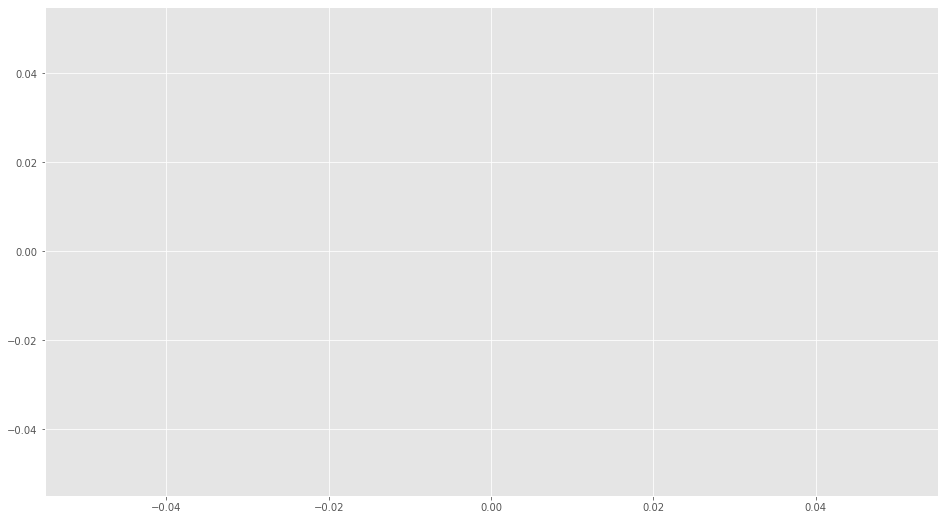

In [81]:
########### modelo sin PCA ##########
#librerias
from sklearn.preprocessing import LabelEncoder
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler as MMS
from sklearn.cluster import KMeans

ruta = 'https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/melbournehouses.csv'
df_melbour = pd.read_csv(ruta)
print(df_melbour.head())
X_ = df_melbour.drop(columns = ['Suburb','Address','Type','Method','SellerG','Date','CouncilArea', 'Regionname' ])
X_featuresarray = np.array(X_)


scaler = MinMaxScaler()
X_scal =scaler.fit_transform(X_featuresarray)

inercia =[]
for i in range(13580,13):
  k_means = KMeans(n_clusters = i)
  k_means.fit(X_scal)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu

plt.plot(range(0,),inercia)



In [ ]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
#librerias que se va a usar
from sklearn import datasets
from sklearn.ensemble import RandomForestRegressor as rfr
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error
##introducimos la data
data=datasets.load_wine()
x=data.data
y=data.target
print(np.shape(x))
print(np.shape(y))
y=np.reshape(y, (178,1))#corregimos el vector
print(np.shape(y))
xtrain, xtest,ytrain,ytest=tts(x,y, random_state= 42)#dividimos la data
modelrf= rfr(n_estimators=200,random_state=42)
modelrf.fit(xtrain, ytrain)#entrenamos el modelo
"""
verificamos los resultados
"""
ypred= modelrf.predict(xtest)
R2RF= r2_score(ytest,ypred)
print(R2RF)# r2 de la data de validacion
#ahora analizamos el r de la data de entrenamiento 
ypred_t= modelrf.predict(xtrain)
R2RT= r2_score(ytrain,ypred_t)
print(R2RT)

print(R2RF,R2RT)
"""
Este modelo está generalizado, pues el r2 de train es parecido a r2 de validacion y ademas es mayor a 0.50
"""

(178, 13)
(178,)
(178, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


0.9123404850746268
0.9896106325642965
0.9123404850746268 0.9896106325642965


'\nEste modelo está generalizado, pues el r2 de train es parecido a r2 de validacion y ademas es mayor a 0.50\n'

[[1]
 [1]
 [1]
 [1]]
(569, 1)
[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.385

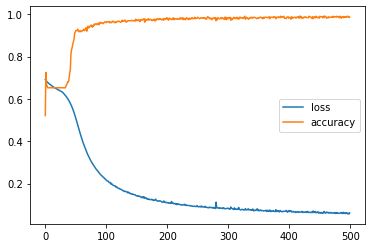

In [ ]:
from numpy.core.numeric import False_
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""

cancerdf = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
###libreria
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
###
dfX = cancerdf.drop(columns = ['id','diagnosis'])
from sklearn.preprocessing import LabelEncoder
y = np.array(cancerdf['diagnosis'])
Encoder = LabelEncoder()
y = Encoder.fit_transform(y)
y = np.reshape(y,(len(y),1))
print(y[:4])
print(np.shape(y))
####
escalar = MinMaxScaler()
X = np.array(dfX)
X = escalar.fit_transform(X)
print(X[0:4,:])

Xtrain,Xtest,ytrain,ytest = tts(X,y)

ModeloClasificador3 = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])

ModeloClasificador3.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

historico = ModeloClasificador3.fit(Xtrain,ytrain,epochs = 500,verbose= False)
pd.DataFrame(historico.history).plot()

(352, 352, 3)
(371712,)


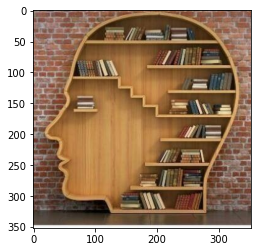

In [ ]:
"""
Crea una función que aplane la ruta de una imágen
"""
import matplotlib.pyplot as plt
import numpy as np
img=  plt.imread('/content/imagen fondo.png')

plt.imshow(img)#muestra la imagen

print(np.shape(img))#matriz que se generaria de datos

img_vector=img.flatten() #este codigo alpana la imagen

print(np.shape(img_vector))